<a href="https://colab.research.google.com/github/lucaskrms/AIProjects/blob/main/TP6_ES98872.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests

req = requests.get("https://raw.githubusercontent.com/alcionepaiva/musicas/main/sertanejo.txt")
url_content = req.content
arquivo = open('sertanejo.txt', 'wb')
arquivo.write(url_content)
arquivo.close()

req = requests.get("https://raw.githubusercontent.com/alcionepaiva/musicas/main/funk.txt")
url_content = req.content
arquivo = open('funk.txt', 'wb')
arquivo.write(url_content)
arquivo.close()

!ls -la

total 2160
drwxr-xr-x 1 root root    4096 Oct 29 01:38 .
drwxr-xr-x 1 root root    4096 Oct 29 01:37 ..
drwxr-xr-x 4 root root    4096 Oct 26 13:33 .config
-rw-r--r-- 1 root root 1280715 Oct 29 01:38 funk.txt
drwxr-xr-x 1 root root    4096 Oct 26 13:34 sample_data
-rw-r--r-- 1 root root  911569 Oct 29 01:38 sertanejo.txt


# **FUNK**

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Number of lines used: 41306

rebuilding corpus...
['mc', 'don', 'juan', 'amar', 'amei', 'gostar', 'gostei']
/mc-don-juan/amar-amei-gostar-gostei/
Amar, amei
Gostar, gostei
Mas agora eu não quero nem de graça

Tokenizando...
************************
Numero de linhas: 41306
Numero de palavras 244192
Tamanho vocabulario: 12264
['mc', 'don', 'juan']
[[], [9], [12]]
Calculando Frequencia...
<FreqDist with 12264 samples and 244192 outcomes>


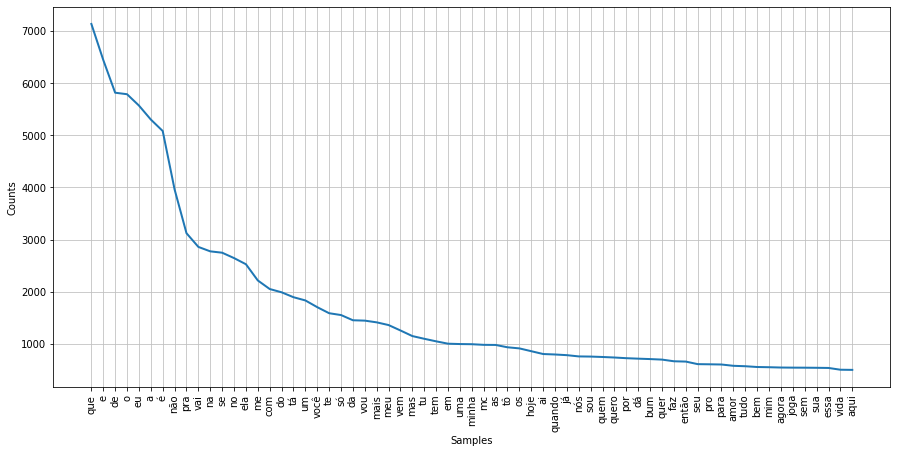

Gerando bigrams...
**************************************
computando a distribuicao de frequencia para todos os bigrams no texto
Numero: 244191


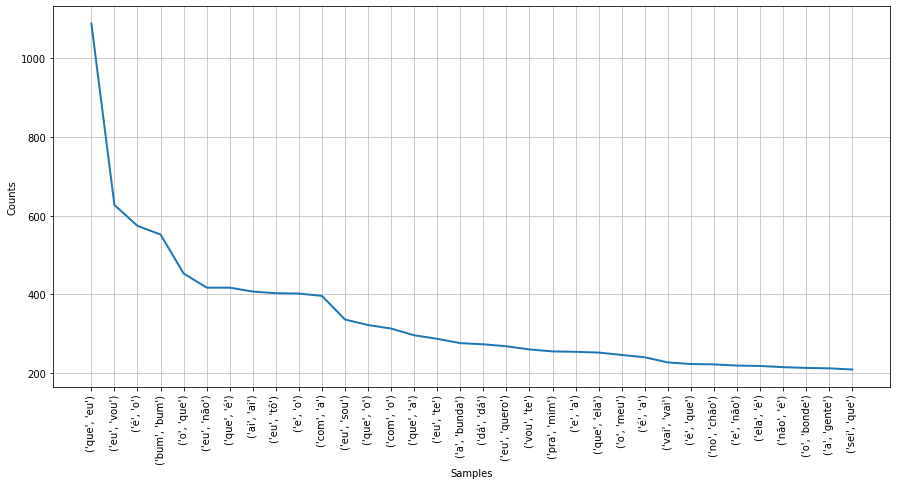


Processing time: 18.240280628204346


In [ ]:
import time 
import operator
from matplotlib import pyplot
from nltk.text import Text
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from nltk.util import ngrams
from numpy import array
import numpy as np
from numpy import zeros
from numpy import asarray
from keras.preprocessing.text import Tokenizer
from nltk.tokenize import RegexpTokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import text_to_word_sequence
import nltk


tempo = time.time()
nltk.download('punkt')

#Parameters
PERCENTAGE = 100       # Percentage of the corpus that will be used

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, mode='rt', encoding='UTF-8')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text
 
# split a loaded document into sentences
def to_lines(doc, percentage):
  lines = doc.strip().split('\n')
  n = int(len(lines)*percentage/100)
  print('Number of lines used:',n)
  if lines[n-1]=="":
    return lines[:n-1]
  return lines

#loading the corpus 
filename = 'funk.txt'
doc = load_doc(filename)
corpus = to_lines(doc,PERCENTAGE)
sentences=[]

print('\nrebuilding corpus...')
for linha in corpus:
  tokens = text_to_word_sequence(linha)
  sentences.append(tokens)

print(sentences[0])

for l in corpus[:4]:
   print(l)
    
palavras=[]

print ("\nTokenizando...")
palavras = text_to_word_sequence(doc)
vocab = sorted(set(palavras))
vocab_size = len(vocab)

tokenizer = Tokenizer(lower=True, split=' ') 
tokenizer.fit_on_texts(doc)
sequences = tokenizer.texts_to_sequences(doc)
print("************************") 
print('Numero de linhas:',len(corpus))
print('Numero de palavras',len(palavras))
print('Tamanho vocabulario:',vocab_size)

print(palavras[:3])
print(sequences[:3])

print("Calculando Frequencia...")

fdist = nltk.FreqDist(palavras)

print(fdist)

sorted_fdist = sorted(fdist.items(), key=operator.itemgetter(1))

ntokens = len(sorted_fdist)

num = len([a for a in fdist if fdist[a]>(500)])
pyplot.figure(figsize=(15, 7))
fdist.plot(num) 


print ("Gerando bigrams...")
n = 2
bgs = ngrams(palavras, n)

print("**************************************")
print("computando a distribuicao de frequencia para todos os bigrams no texto")
fdist = nltk.FreqDist(bgs)

print ("Numero:",fdist.N())

num = len([a for a in fdist if fdist[a]>(200)])

pyplot.figure(figsize=(15, 7))
fdist.plot(num)


print ("\nProcessing time:",time.time() -tempo)

Word2vec...
amar:['tu', 'amor', 'por', 'amo', 'oh']
hoje:['e', 'eu', 'pra', 'a', 'que']
mais:['não', 'quando', 'que', 'se', 'vou']
mc:['que', 'de', 'a', 'mas', 'se']
quero:['eu', 'por', 'a', 'vou', 'e']
agora:['de', 'a', 'o', 'então', 'e']
joga:['então', 'bunda', 'a', 'na', 'quando']
você:['tô', 'meu', 'minha', 'mas', 'amor']
então:['a', 'quando', 'eu', 'ela', 'com']
eu:['não', 'a', 'e', 'se', 'de']
------------Similar entre palavras-------------
palavras: colchão e cama
-0.050807286

...Fim...


<Figure size 432x288 with 0 Axes>

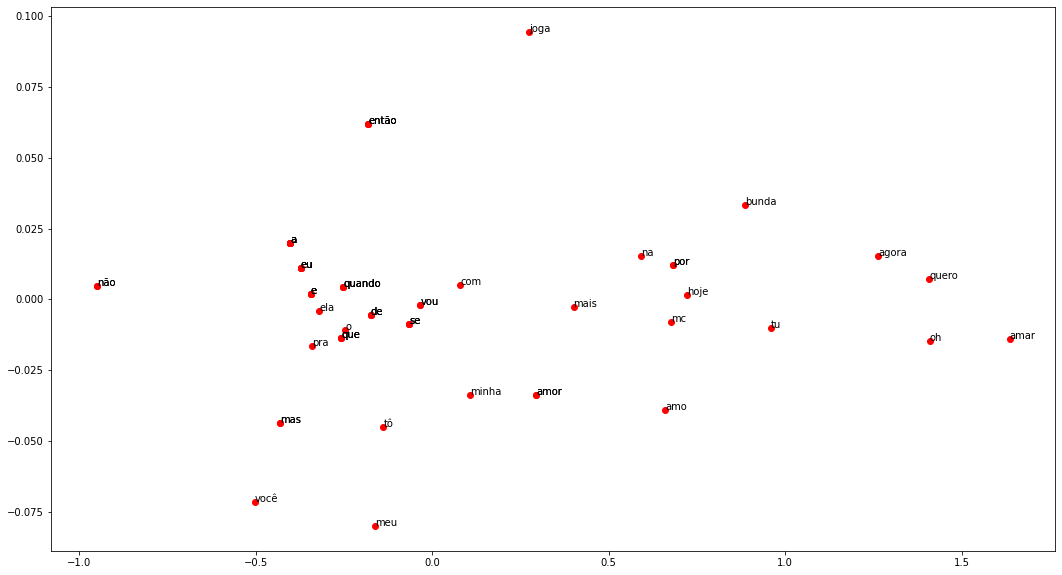

In [ ]:
import os
import pandas as pd
import nltk
import gensim
import numpy as np
import codecs
import itertools
import time
import random

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

from gensim import corpora, models, similarities
from nltk.probability import *

from sklearn.decomposition import PCA
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding

from numpy import asarray
from numpy import zeros

tempo = time.time()

print ("Word2vec...")

vector_size = 64

model = gensim.models.Word2Vec([palavras], min_count=1,window=5,  size=vector_size)

# fit a 2d PCA model to the vectors
semantically_similar_words = {words: [item[0] for item in model.wv.most_similar([words], topn=5)]
  for words in ['amar', 'hoje', 'mais', 'mc', 'quero', 'agora', 'joga', 'você', 'então', 'eu']}

for k,v in semantically_similar_words.items():
    print(k+":"+str(v))


all_similar_words = sum([[k] + v for k, v in semantically_similar_words.items()], [])

word_vectors = model.wv[all_similar_words]

pca = PCA(n_components=2)

p_comps = pca.fit_transform(word_vectors)
word_names = all_similar_words
pyplot.clf()
pyplot.figure(figsize=(18, 10))
pyplot.scatter(p_comps[:, 0], p_comps[:, 1], c='red')

for word_names, x, y in zip(word_names, p_comps[:, 0], p_comps[:, 1]):
    pyplot.annotate(word_names, xy=(x, y), xytext=(0, 0), textcoords='offset points')


print("------------Similar entre palavras-------------")
print("palavras: colchão e", teste)
print(model.wv.similarity('colchão', teste))

print ("\n...Fim...")

# **SERTANEJO**

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Number of lines used: 30057

rebuilding corpus...
['me', 'desculpe', 'vir', 'aqui', 'desse', 'jeito']
Me desculpe vir aqui desse jeito
Me perdoe o traje de maloqueiro
De camisa larga e boné pra trás
Bem na hora da novela que a senhora gosta mais

Tokenizando...
************************
Numero de linhas: 30057
Numero de palavras 177241
Tamanho vocabulario: 8097
['me', 'desculpe', 'vir']
[[7], [1], []]
Calculando Frequencia...
<FreqDist with 8097 samples and 177241 outcomes>


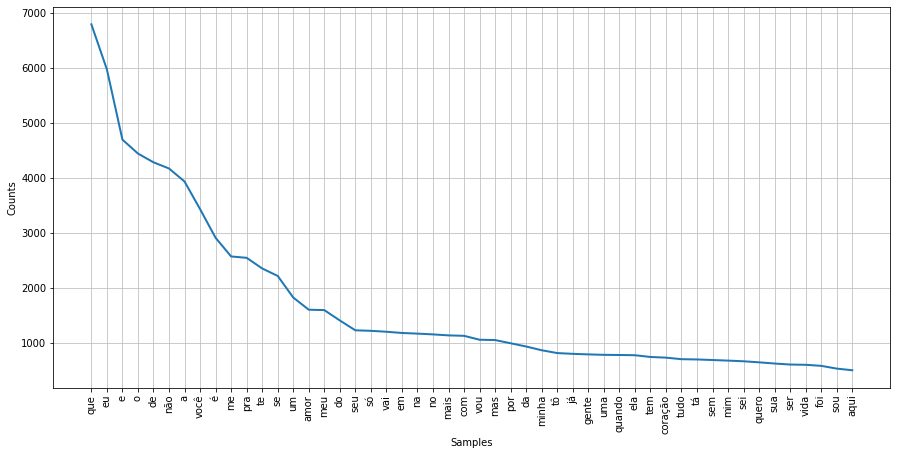

Gerando bigrams...
**************************************
computando a distribuicao de frequencia para todos os bigrams no texto
Numero: 177240


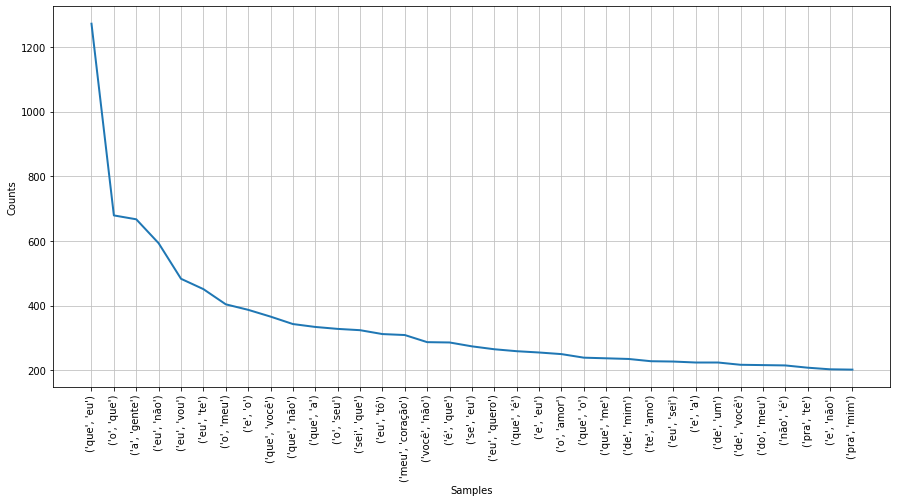


Processing time: 13.088873147964478


In [ ]:
tempo = time.time()
nltk.download('punkt')

#Parameters
PERCENTAGE = 100       # Percentage of the corpus that will be used

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, mode='rt', encoding='UTF-8')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text
 
# split a loaded document into sentences
def to_lines(doc, percentage):
  lines = doc.strip().split('\n')
  n = int(len(lines)*percentage/100)
  print('Number of lines used:',n)
  if lines[n-1]=="":
    return lines[:n-1]
  return lines

#loading the corpus 
filename = 'sertanejo.txt'
doc = load_doc(filename)
corpus = to_lines(doc,PERCENTAGE)
sentences=[]

print('\nrebuilding corpus...')
for linha in corpus:
  tokens = text_to_word_sequence(linha)
  sentences.append(tokens)

print(sentences[0])

for l in corpus[:4]:
   print(l)
    
palavras=[]

print ("\nTokenizando...")
palavras = text_to_word_sequence(doc)
vocab = sorted(set(palavras))
vocab_size = len(vocab)

tokenizer = Tokenizer(lower=True, split=' ') 
tokenizer.fit_on_texts(doc)
sequences = tokenizer.texts_to_sequences(doc)
print("************************") 
print('Numero de linhas:',len(corpus))
print('Numero de palavras',len(palavras))
print('Tamanho vocabulario:',vocab_size)

print(palavras[:3])
print(sequences[:3])

print("Calculando Frequencia...")

fdist = nltk.FreqDist(palavras)

print(fdist)

sorted_fdist = sorted(fdist.items(), key=operator.itemgetter(1))

ntokens = len(sorted_fdist)

num = len([a for a in fdist if fdist[a]>(500)])
pyplot.figure(figsize=(15, 7))
fdist.plot(num) 


print ("Gerando bigrams...")
n = 2
bgs = ngrams(palavras, n)

print("**************************************")
print("computando a distribuicao de frequencia para todos os bigrams no texto")
fdist = nltk.FreqDist(bgs)

print ("Numero:",fdist.N())

num = len([a for a in fdist if fdist[a]>(200)])

pyplot.figure(figsize=(15, 7))
fdist.plot(num)


print ("\nProcessing time:",time.time() -tempo)

Word2vec...
amar:['por', 'e', 'aí', 'hoje', 'meu']
hoje:['e', 'esse', 'aí', 'eu', 'você']
mais:['que', 'um', 'não', 'te', 'uma']
mc:['franga', 'indo', 'berrante', 'unidos', 'deságua']
quero:['que', 'eu', 'a', 'e', 'é']
agora:['de', 'a', 'vai', 'seu', 'o']
joga:['louco', 'às', 'perfeição', 'vi', 'abraça']
você:['de', 'e', 'não', 'o', 'a']
então:['ela', 'a', 'que', 'de', 'com']
eu:['a', 'e', 'não', 'é', 'de']

...Fim...


<Figure size 432x288 with 0 Axes>

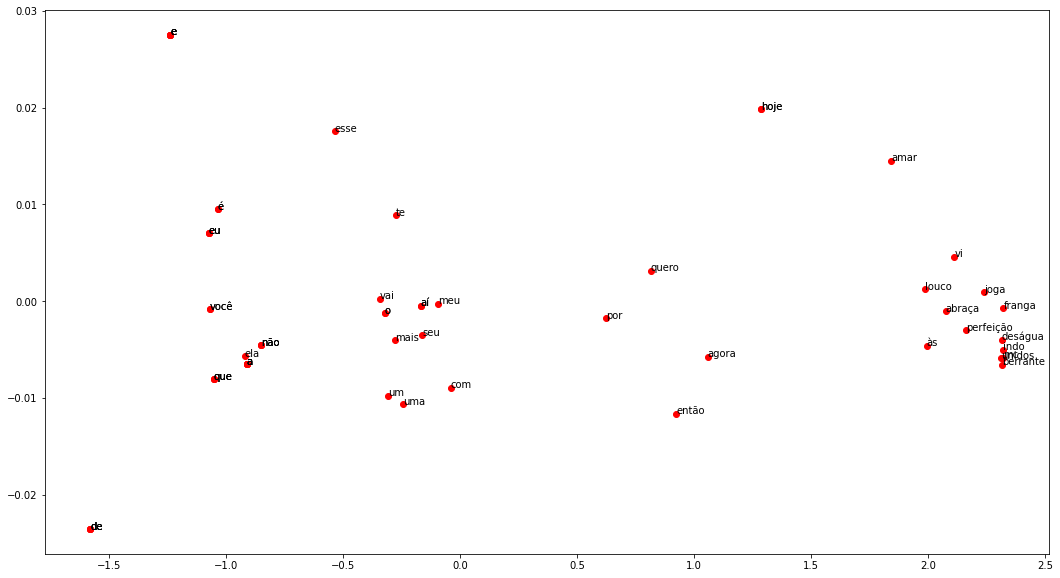

In [ ]:
tempo = time.time()

print ("Word2vec...")

vector_size = 64

model = gensim.models.Word2Vec([palavras], min_count=1,window=5,  size=vector_size)

# fit a 2d PCA model to the vectors
semantically_similar_words = {words: [item[0] for item in model.wv.most_similar([words], topn=5)]
  for words in ['amar', 'hoje', 'mais', 'mc', 'quero', 'agora', 'joga', 'você', 'então', 'eu']}

for k,v in semantically_similar_words.items():
    print(k+":"+str(v))


all_similar_words = sum([[k] + v for k, v in semantically_similar_words.items()], [])

word_vectors = model.wv[all_similar_words]

pca = PCA(n_components=2)

p_comps = pca.fit_transform(word_vectors)
word_names = all_similar_words
pyplot.clf()
pyplot.figure(figsize=(18, 10))
pyplot.scatter(p_comps[:, 0], p_comps[:, 1], c='red')

for word_names, x, y in zip(word_names, p_comps[:, 0], p_comps[:, 1]):
    pyplot.annotate(word_names, xy=(x, y), xytext=(0, 0), textcoords='offset points')

print ("\n...Fim...")